<a href="https://colab.research.google.com/github/warriors8970/Gen-AI/blob/main/Image%20Generation/Diffusion%20Models/diffusion_model3/diffusion_model3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [ ]:
%pip install -qq diffusers datasets accelerate wandb open-clip-torch

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 521.2/521.2 kB 16.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.7/265.7 kB 16.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 26.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 32.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 16.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 21.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.6/190.6 kB 29.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 254.1/254.1 kB 33.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.4/53.4 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 37.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 44.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
import numpy as np
import torch
import torch.nn.functional as F
import torchvision
from datasets import load_dataset
from diffusers import DDIMScheduler, DDPMPipeline
from matplotlib import pyplot as plt
from PIL import Image
from torchvision import transforms
from tqdm.auto import tqdm

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

# View a pretrained model

In [ ]:
image_pipe = DDPMPipeline.from_pretrained("google/ddpm-celebahq-256")
image_pipe.to(device);

model_index.json:   0%|          | 0.00/180 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors not found


Fetching 4 files:   0%|          | 0/4 [00:00<?, ?it/s]

config.json:   0%|          | 0.00/790 [00:00<?, ?B/s]

scheduler_config.json:   0%|          | 0.00/256 [00:00<?, ?B/s]

diffusion_pytorch_model.bin:   0%|          | 0.00/455M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/2 [00:00<?, ?it/s]

In [ ]:
#iamges = image_pipe().images

In [ ]:
#iamges[0]

## Using DDIM Scheduler
reduce the number of steps from 1000 to 40

**Results:**
```So changing scheduler will decrease the time of generation```

In [ ]:
scheduler = DDIMScheduler.from_pretrained("google/ddpm-celebahq-256")
scheduler.set_timesteps(num_inference_steps = 40)

In [ ]:
scheduler.timesteps

tensor([975, 950, 925, 900, 875, 850, 825, 800, 775, 750, 725, 700, 675, 650,
        625, 600, 575, 550, 525, 500, 475, 450, 425, 400, 375, 350, 325, 300,
        275, 250, 225, 200, 175, 150, 125, 100,  75,  50,  25,   0])

0it [00:00, ?it/s]

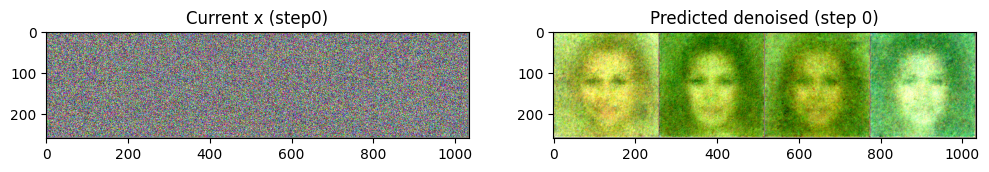

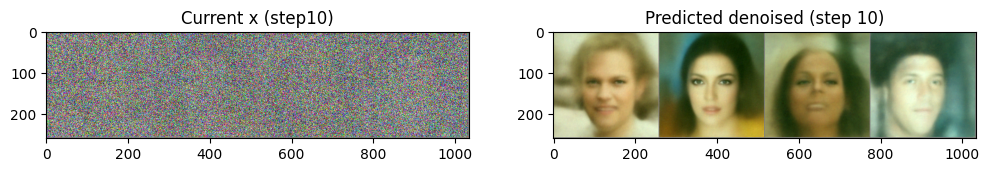

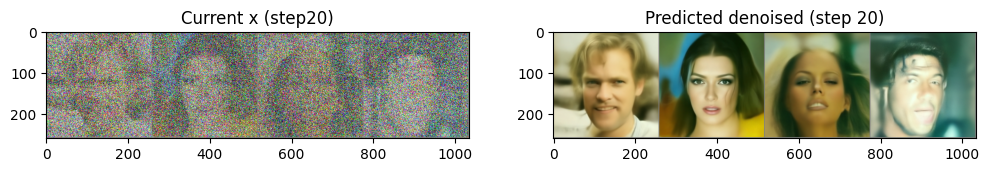

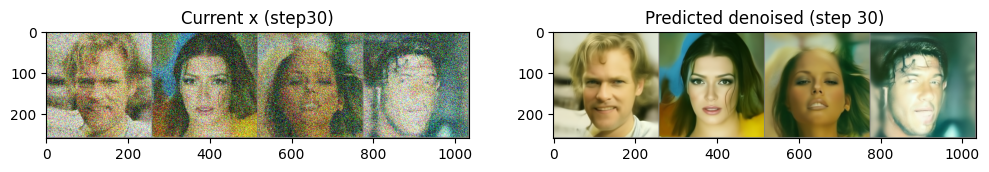

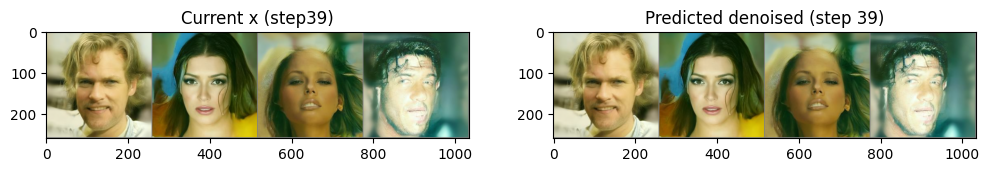

In [ ]:
x = torch.randn(4,3,256,256).to(device) # 4 images, with 3 clr channels of 256 x 256 size

for i,t in tqdm(enumerate(scheduler.timesteps)):

  model_input = scheduler.scale_model_input(x,t) # input noise in timestep frames

  with torch.no_grad():
    noise_pred = image_pipe.unet(model_input, t)["sample"] # predictions

  scheduler_output = scheduler.step(noise_pred, t , x)

  x = scheduler_output.prev_sample # updating x on timestep factors

  # Visualising them images
  if i%10 ==0 or i == len(scheduler.timesteps) - 1:
    fig, ax = plt.subplots(1,2, figsize = (12,5))

    grid = torchvision.utils.make_grid(x, nrow = 4).permute(1,2,0)
    ax[0].imshow(grid.cpu().clip(-1,1) * 0.5 + 0.5)
    ax[0].set_title(f"Current x (step{i})")

    pred_x0 = (scheduler_output.pred_original_sample)
    grid = torchvision.utils.make_grid(pred_x0, nrow = 4).permute(1,2,0)
    ax[1].imshow(grid.cpu().clip(-1,1)*0.5 + 0.5)
    ax[1].set_title(f"Predicted denoised (step {i})")
    plt.show()


In [ ]:
x = torch.randn(4,3,256,256)
t = scheduler.timesteps
model_input =scheduler.scale_model_input(x, t)
model_input.shape, t.shape

(torch.Size([4, 3, 256, 256]), torch.Size([40]))

In [ ]:
#scheduler_output = scheduler.step(noise_pred, t , x)
#len(scheduler_output)

In [ ]:
noise_pred.shape

torch.Size([4, 3, 256, 256])

In [ ]:
scheduler_output.prev_sample.shape

torch.Size([4, 3, 256, 256])

In [ ]:
pred_x0 = (scheduler_output.pred_original_sample)
pred_x0.shape

torch.Size([4, 3, 256, 256])

  0%|          | 0/40 [00:00<?, ?it/s]

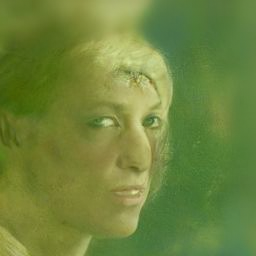

In [ ]:
image_pipe.scheduler = scheduler
images = image_pipe(num_inference_steps=40).images
images[0]

# Fine Tuning
- Dataset:
  We can use
   - Vintage faces - `Norod78/Vintage-Faces-FFHQAligned`
   - Anime Faces - `huggan/anime-faces`
   

In [ ]:
# Load dataset
dataset_name = "huggan/smithsonian_butterflies_subset"
dataset_butterfly = load_dataset(dataset_name, split = "train")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/repocard.py:105: UserWarning: Repo card metadata block was not found. Setting CardData to empty.
  warnings.warn("Repo card metadata block was not found. Setting CardData to empty.")


Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Generating train split:   0%|          | 0/1000 [00:00<?, ? examples/s]

Preview:


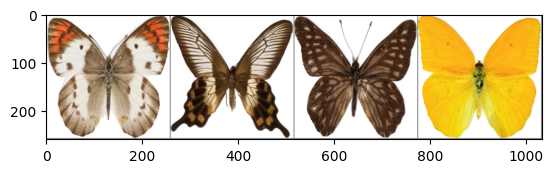

In [ ]:
image_size = 256
batch_size = 4

preprocess = transforms.Compose(
    [
        transforms.Resize((image_size, image_size)),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.5], [0.5]),
    ]
)
def transform(examples):
  images_butterfly = [preprocess(image.convert("RGB")) for image in examples["image"]]
  return {"images" : images_butterfly}

dataset_butterfly.set_transform(transform)

train_dataloader = torch.utils.data.DataLoader(
    dataset_butterfly, batch_size = batch_size, shuffle = True
)

print("Preview:")
batch = next(iter(train_dataloader))
grid = torchvision.utils.make_grid(batch["images"], nrow = 4)
plt.imshow(grid.permute(1,2,0).cpu().clip(-1,1) * 0.5 + 0.5)

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/250 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/diffusers/configuration_utils.py:135: FutureWarning: Accessing config attribute `num_train_timesteps` directly via 'DDIMScheduler' object attribute is deprecated. Please access 'num_train_timesteps' over 'DDIMScheduler's config object instead, e.g. 'scheduler.config.num_train_timesteps'.
  deprecate("direct config name access", "1.0.0", deprecation_message, standard_warn=False)


Epoch: 0| Avg loss: 0.013030625518527813


  0%|          | 0/250 [00:00<?, ?it/s]

Epoch: 1| Avg loss: 0.011924496711581014


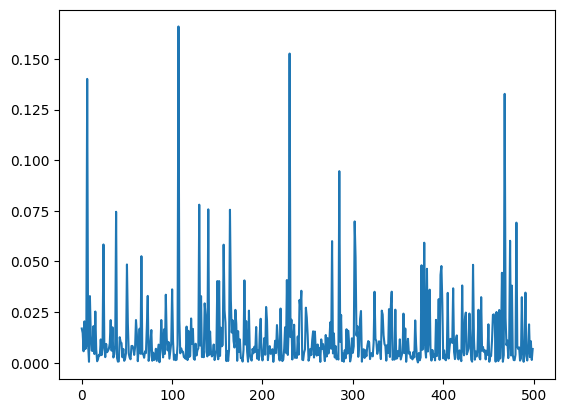

In [ ]:
NUM_EPOCHS = 2
grad_accumulation_steps = 2 # reset the gradient des - `.step()` and make it zero grad at a particular step

optimizer = torch.optim.AdamW(image_pipe.unet.parameters(), lr = 1e-5)

losses = []

for epoch in tqdm(range(NUM_EPOCHS)):
  for step, batch in tqdm(enumerate(train_dataloader), total = len(train_dataloader)):
    # images from dataset
    clean_images = batch["images"].to(device)

    noise = torch.randn(clean_images.shape).to(clean_images.device) # full random noise of original shape
    bs = clean_images.shape[0]
    timesteps = torch.randint(0, image_pipe.scheduler.num_train_timesteps,# Total size of it
                              (bs,), # final shape of timesteps
                              device = clean_images.device).long() # configuring it to its device

    noisy_images = image_pipe.scheduler.add_noise(clean_images, noise, timesteps)

    noise_pred = image_pipe.unet(noisy_images, timesteps, return_dict = False)[0]

    loss = F.mse_loss(
        noise_pred, noise
    )

    losses.append(loss.item())

    loss.backward(loss)

    if(step+1) % grad_accumulation_steps == 0:
      optimizer.step()
      optimizer.zero_grad()


  print(f"Epoch: {epoch}| Avg loss: {sum(losses[-len(train_dataloader):])/len(train_dataloader)}")

plt.plot(losses)





In [ ]:
clean_images = batch["images"].to(device)
bs = clean_images.shape[0]
noise = torch.randint(0, image_pipe.scheduler.num_train_timesteps,(bs,),
                          device = clean_images.device).long()

In [ ]:
noise

tensor([449, 760, 253, 584], device='cuda:0')

In [ ]:
image_pipe

DDPMPipeline {
  "_class_name": "DDPMPipeline",
  "_diffusers_version": "0.24.0",
  "_name_or_path": "google/ddpm-celebahq-256",
  "scheduler": [
    "diffusers",
    "DDIMScheduler"
  ],
  "unet": [
    "diffusers",
    "UNet2DModel"
  ]
}

In [ ]:
image_pipe.scheduler.num_train_timesteps

1000

In [ ]:
noise = torch.randn(clean_images.shape).to(clean_images.device)
noise.shape

torch.Size([4, 3, 256, 256])

# Visualizing the trained model images

0it [00:00, ?it/s]

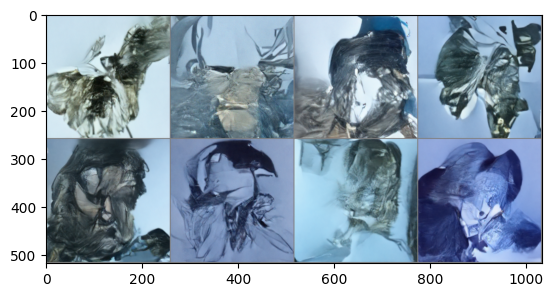

In [ ]:
x = torch.randn(8,3,256,256).to(device) # random tensor
for i, t in tqdm(enumerate(scheduler.timesteps)): # i - index, t - timestep values
    model_input = scheduler.scale_model_input(x,t)
    with torch.no_grad():
      noise_pred = image_pipe.unet(model_input,t)["sample"]
    x = scheduler.step(noise_pred, t ,x).prev_sample
grid = torchvision.utils.make_grid(x, nrow=4)
plt.imshow(grid.permute(1,2,0).cpu().clip(-1,1)* 0.5 + 0.5)

0it [00:00, ?it/s]

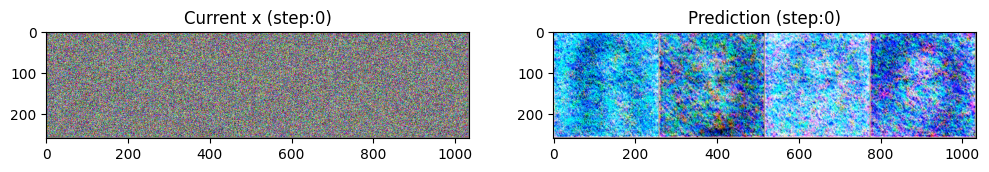

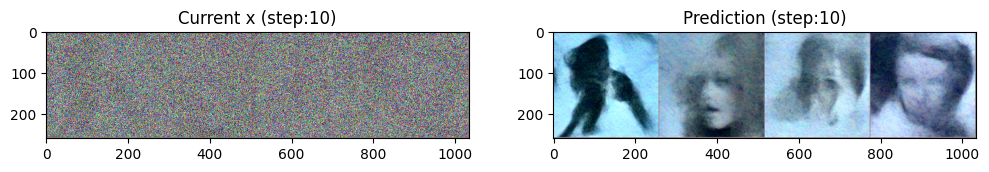

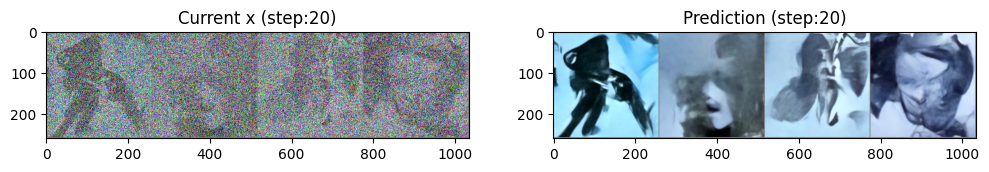

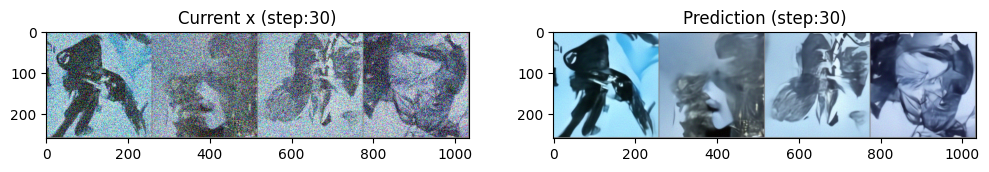

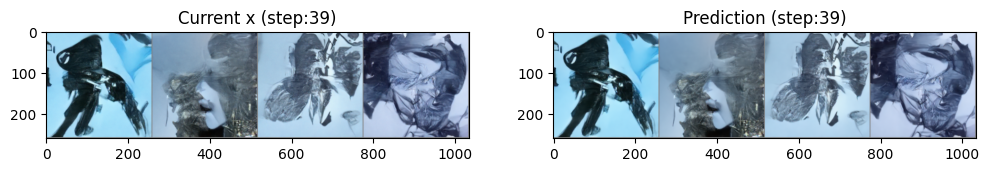

In [ ]:
x = torch.randn(4,3,256,256).to(device)

for i,t in tqdm(enumerate(scheduler.timesteps)):

  model_input = scheduler.scale_model_input(x,t)

  with torch.no_grad():
    noise_pred = image_pipe.unet(model_input,t)["sample"]

  x = scheduler.step(noise_pred, t , x).prev_sample

  if i%10 == 0 or i ==len(scheduler.timesteps)-1:
    fig, ax = plt.subplots(1,2, figsize=(12,5))

    grid = torchvision.utils.make_grid(x, nrow=4).permute(1,2,0)
    ax[0].imshow(grid.cpu().clip(-1,1)* 0.5 + 0.5)
    ax[0].set_title(f"Current x (step:{i})")

    pred_x0 = (scheduler.step(noise_pred, t, x).pred_original_sample)
    grid = torchvision.utils.make_grid(pred_x0, nrow = 4).permute(1,2,0)
    ax[1].imshow(grid.cpu().clip(-1,1)* 0.5 + 0.5)
    ax[1].set_title(f"Prediction (step:{i})")
    plt.show()

So basically `gradient_accumulation_step` is fine-tuning🤔

Expected Output: Butterflies

The model outputs are not what we expected.Why?
- We trained with human faces and inputted butterflies
- If we train for a long time, prolly the output will change
- Changing the learning rate to lower will do the job

This is where **Guidance** Comes in 😏

# Guidance

Step 1 to create conditioning function: reduce some measures(losses)
- `color_loss` - Compares the pixels of an image to target color and returns avg error

In [ ]:
def color_loss(images, target_color=(0.1, 0.9, 0.5)):
    """Given a target color (R, G, B) return a loss for how far away on average
    the images' pixels are from that color. Defaults to a light teal: (0.1, 0.9, 0.5)"""
    target = (
        torch.tensor(target_color).to(images.device) * 2 - 1
    )  # Map target color to (-1, 1)
    target = target[
        None, :, None, None
    ]  # Get shape right to work with the images (b, c, h, w)
    error = torch.abs(
        images - target
    ).mean()  # Mean absolute difference between the image pixels and the target color
    return error

Now we create modified version of sampling loop
2 versions
1. set `requires_grad` on `x` **after** we get noise pred
2. set `requires_grad` on `x` **before** we get the noise pred

0it [00:00, ?it/s]

0 loss: 24.35493278503418
10 loss: 14.69082260131836
20 loss: 14.0374174118042
30 loss: 14.234827041625977


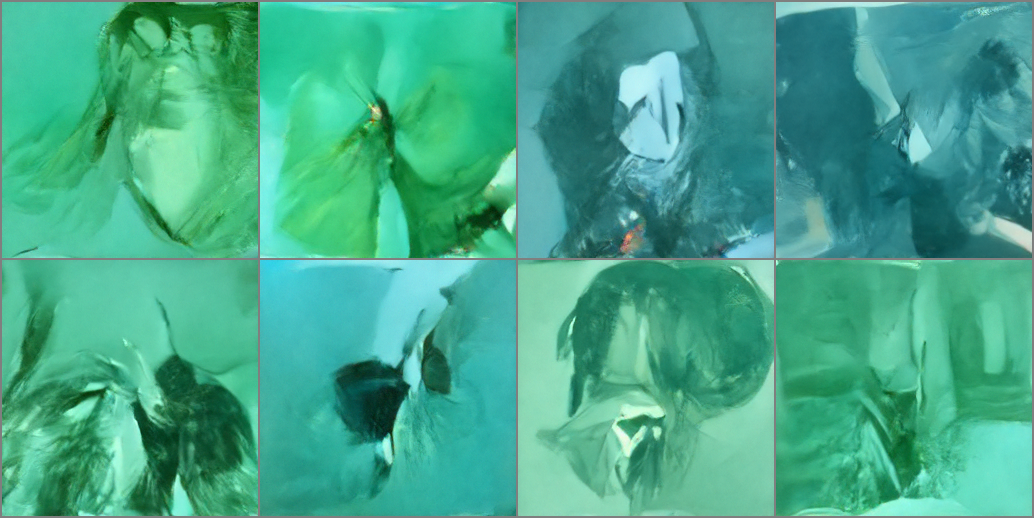

In [ ]:
# Variation 1:

guidance_loss_scale = 40 # strength of the effect

x = torch.randn(8,3,256,256).to(device)

for i,t in tqdm(enumerate(scheduler.timesteps)):

  model_input = scheduler.scale_model_input(x,t)

  with torch.no_grad():
    noise_pred = image_pipe.unet(model_input, t)["sample"]

  x = x.detach().requires_grad_() # After noise pred

  x0 = scheduler.step(noise_pred, t, x).pred_original_sample

  loss = color_loss(x0) * guidance_loss_scale

  if i%10 == 0:
    print(i, "loss:", loss.item())

  cond_grad = -torch.autograd.grad(loss, x)[0] # get gradient

  x = x.detach() + cond_grad # modify x
  x = scheduler.step(noise_pred, t, x).prev_sample # step with scheduler

grid = torchvision.utils.make_grid(x, nrow = 4)
im = grid.permute(1,2,0).cpu().clip(-1,1)* 0.5 + 0.5
Image.fromarray(np.array(im*255).astype(np.uint8))

In [ ]:
# Variation 2

guidance_loss_scale = 40
x = torch.randn(4,3,256,256).to(device)

for i, t in tqdm(enumerate(scheduler.timesteps)):

  x = x.detach().requires_grad_() #before forward pass
  model_input = scheduler.scale_model_input(x,t) # not coming under no_grad() cuz grad first

  noise_pred = image_pipe.unet(model_input, t)["sample"]

  x0 = scheduler.step(noise_pred, t, x).pred_original_sample

  loss = color_loss(x0)* guidance_loss_scale
  if i%10 == 0:
    print(i, "loss:", loss.item())

    cond_grad =-torch.autograd.grad(loss, x)[0]

    x = x.detach() + cond_grad

    x = scheduler.step(noise_pred, t, x).prev_sample

grid = torchvision.utils.make_grid(x, nrow=4)
im = grid.permute(1, 2, 0).cpu().clip(-1, 1) * 0.5 + 0.5
Image.fromarray(np.array(im * 255).astype(np.uint8))



0it [00:00, ?it/s]

# CLIP Model
This model was created by OpenAI

This is a `text-to-image` model

Approach:
- Embed the text prompt to get 512-dim CLIP embedding of the text
- Make several variants of the predcted denoised image
- Compare the embeddings
- Calculate the gradient of this loss wrt current noise -> modify x and update with scheduler



In [ ]:
import open_clip

clip_model, _, preprocess = open_clip.create_model_and_transforms(
    "ViT-B-32", pretrained = "openai"
)

100%|████████████████████████████████████████| 354M/354M [00:02<00:00, 149MiB/s]


In [ ]:
clip_model.to(device)
clip_model

CLIP(
  (visual): VisionTransformer(
    (conv1): Conv2d(3, 768, kernel_size=(32, 32), stride=(32, 32), bias=False)
    (patch_dropout): Identity()
    (ln_pre): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
    (transformer): Transformer(
      (resblocks): ModuleList(
        (0-11): 12 x ResidualAttentionBlock(
          (ln_1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
          (attn): MultiheadAttention(
            (out_proj): NonDynamicallyQuantizableLinear(in_features=768, out_features=768, bias=True)
          )
          (ls_1): Identity()
          (ln_2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
          (mlp): Sequential(
            (c_fc): Linear(in_features=768, out_features=3072, bias=True)
            (gelu): QuickGELU()
            (c_proj): Linear(in_features=3072, out_features=768, bias=True)
          )
          (ls_2): Identity()
        )
      )
    )
    (ln_post): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
  )
  

In [ ]:
# transforms to make image match the CLIP's training data
tfms = torchvision.transforms.Compose(
    [
        torchvision.transforms.RandomResizedCrop(224),
        torchvision.transforms.RandomAffine(5),
        torchvision.transforms.RandomHorizontalFlip(),
        torchvision.transforms.Normalize(
            mean=(0.48145466, 0.4578275, 0.40821073), # Values copied from original code
            std=(0.26862954, 0.26130258, 0.27577711), # no idea where they came from
        ),
    ]
)

# Loss function that takes image, embed it and compares with text prompt

def clip_loss(image, text_features):
  image_features = clip_model.encode_image(
      tfms(image) # applying transform to the image
  )
  input_normed = torch.nn.functional.normalize(image_features.unsqueeze(1), dim = 2)
  embed_normed = torch.nn.functional.normalize(text_features.unsqueeze(0), dim=2)

  dists = (
      input_normed.sub(embed_normed).norm(dim=2).div(2).arcsin().pow(2).mul(2) # Square Greate Circle Distance
  )
  return dists.mean()


In [ ]:
image = torch.randn(4,3,256,256).to(device)
image_features = clip_model.encode_image(
      tfms(image) # applying transform to the image
  )

/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


In [ ]:
image_features.shape

torch.Size([4, 512])

In [ ]:
input_normed_1 = torch.nn.functional.normalize(image_features.unsqueeze(1), dim = 2)
input_normed_1.shape

torch.Size([4, 1, 512])

In [ ]:
input_normed_0 = torch.nn.functional.normalize(image_features.unsqueeze(0), dim = 2)
input_normed_0.shape

torch.Size([1, 4, 512])

0it [00:00, ?it/s]

Step: 0, Guidance loss 7.199682235717773
Step: 25, Guidance loss 7.216620445251465


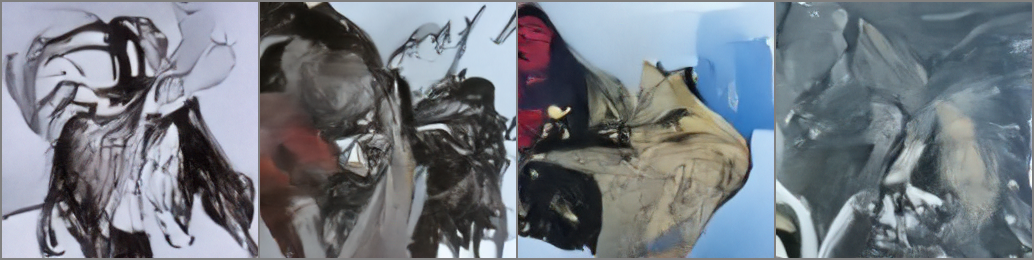

In [ ]:
prompt = "Flower vase painting"

guidance_scale = 8
n_cuts = 4

scheduler.set_timesteps(50)
# Embedding process
text = open_clip.tokenize([prompt]).to(device) # Tokenize first
with torch.no_grad(), torch.cuda.amp.autocast():
  text_features = clip_model.encode_text(text)


x = torch.randn(4,3,256,256).to(device)

for i, t in tqdm(enumerate(scheduler.timesteps)):
  model_input = scheduler.scale_model_input(x,t)

  with torch.no_grad():
    noise_pred = image_pipe.unet(model_input, t)["sample"]

  cond_grad = 0

  for cut in range(n_cuts):
    x = x.detach().requires_grad_()

    x0 = scheduler.step(noise_pred, t , x).pred_original_sample

    loss = clip_loss(x0, text_features)* guidance_scale

    cond_grad -= torch.autograd.grad(loss, x)[0]/n_cuts

  if i%25 == 0:
    print(f"Step: {i}, Guidance loss {loss.item()}")

  alpha_bar = scheduler.alphas_cumprod[i]

  x = (x.detach() + cond_grad * alpha_bar.sqrt())

  x = scheduler.step(noise_pred, t, x).prev_sample

grid = torchvision.utils.make_grid(x.detach(), nrow=4)
im = grid.permute(1, 2, 0).cpu().clip(-1, 1) * 0.5 + 0.5
Image.fromarray(np.array(im * 255).astype(np.uint8))

In [ ]:
prompt = "Flower vase painting"
text = open_clip.tokenize([prompt]).to(device)
text.shape

torch.Size([1, 77])

In [ ]:
with torch.no_grad(), torch.cuda.amp.autocast():
  text_features = clip_model.encode_text(text)

text_features.shape

torch.Size([1, 512])

In the above code, the conditioning gradient is updated by the `alpha_bar.sqrt()` factor
Some possible schdules are plotted below

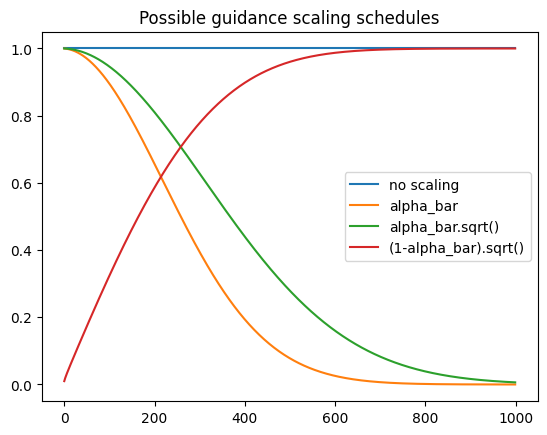

In [ ]:
plt.plot([1 for a in scheduler.alphas_cumprod], label="no scaling")
plt.plot([a for a in scheduler.alphas_cumprod], label="alpha_bar")
plt.plot([a.sqrt() for a in scheduler.alphas_cumprod], label="alpha_bar.sqrt()")
plt.plot(
    [(1 - a).sqrt() for a in scheduler.alphas_cumprod], label="(1-alpha_bar).sqrt()"
)
plt.legend()
plt.title("Possible guidance scaling schedules");